### Load all the Powder Patch Data from Microspecialties

Notebook contents 
* loading all the data from this website
* http://denali.micro-specialties.com/cgi-bin/GlobalModemData.cgi?site=sn166&fun=all

created by Cassie Lumbrazo\
last updated: August 2025\
run location: UAS linux\
python environment: **xarray**

In [1]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()

# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [2]:
pwd

'/home/cassie/python/repos/juneau_data_analysis'

In [3]:
# open the csv 
# filename = "/hdd/snow_hydrology/met_station/powder_patch/microspecialties_url_download_raw.csv" # raw data 
filename = "/hdd/snow_hydrology/met_station/powder_patch/microspecialties_url_download_edit.csv" # just removed a few lines 
# df_micro = pd.read_csv(filename, sep = ",")
df_micro = pd.read_csv(filename, sep=",", engine="python", on_bad_lines="skip") # on_bad_lines="skip"
df_micro

,datetime,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15,data16,data17
0,2015/01/15 11:00,12.61,0.190,89.6,0.0,0.0,0.0,0.0,16.24,72.72,0.000,0.00,0.00,0.0,-273.2,-273.2,0.0,0.01
1,2015/01/15 12:00,12.61,0.462,89.2,0.0,0.0,0.0,0.0,17.03,84.90,0.000,0.00,0.00,0.0,-273.2,-273.2,0.0,0.05
2,2015/01/15 13:00,12.63,0.394,90.6,0.0,0.0,0.0,0.0,16.36,114.20,0.000,0.00,0.00,0.0,-273.2,-273.2,-273.2,0.04
3,2015/01/15 14:00,12.53,0.631,91.2,0.0,0.0,0.0,0.0,16.21,116.40,0.000,0.00,0.00,0.0,-273.2,-273.2,-273.2,0.09
4,2015/01/15 15:00,12.58,0.326,92.5,0.0,0.0,0.0,0.0,16.33,95.30,0.000,0.00,0.00,0.0,-273.2,-273.2,0.0,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63506,2022/08/16 09:00,11.89,10.550,92.8,0.0,0.0,0.0,11.4,-786.50,150.70,-1.613,8.55,11.12,0.0,1868.0,NaN,NaN,NaN
63507,2022/08/16 10:00,11.89,11.220,100.0,0.0,0.0,0.0,11.4,-724.50,150.70,-1.613,8.53,11.70,0.0,1868.0,NaN,NaN,NaN
63508,2022/08/16 11:00,11.89,11.130,100.0,0.0,0.0,0.0,11.4,-743.70,147.60,-1.613,8.51,11.64,0.0,1868.0,NaN,NaN,NaN
63509,2022/08/16 12:00,11.89,11.940,100.0,0.0,0.0,0.0,11.4,-729.10,150.70,-1.613,8.48,12.60,0.0,1868.0,NaN,NaN,NaN


In [4]:
df_micro['datetime'] = pd.to_datetime(df_micro['datetime'], utc=True)
# set datetime as the index
df_micro.set_index('datetime', inplace=True)
df_micro.head()

,data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12,data13,data14,data15,data16,data17
datetime,,,,,,,,,,,,,,,,,
2015-01-15 11:00:00+00:00,12.61,0.190,89.6,0.0,0.0,0.0,0.0,16.24,72.72,0.0,0.0,0.0,0.0,-273.2,-273.2,0.0,0.01
2015-01-15 12:00:00+00:00,12.61,0.462,89.2,0.0,0.0,0.0,0.0,17.03,84.90,0.0,0.0,0.0,0.0,-273.2,-273.2,0.0,0.05
2015-01-15 13:00:00+00:00,12.63,0.394,90.6,0.0,0.0,0.0,0.0,16.36,114.20,0.0,0.0,0.0,0.0,-273.2,-273.2,-273.2,0.04
2015-01-15 14:00:00+00:00,12.53,0.631,91.2,0.0,0.0,0.0,0.0,16.21,116.40,0.0,0.0,0.0,0.0,-273.2,-273.2,-273.2,0.09
2015-01-15 15:00:00+00:00,12.58,0.326,92.5,0.0,0.0,0.0,0.0,16.33,95.30,0.0,0.0,0.0,0.0,-273.2,-273.2,0.0,0.09


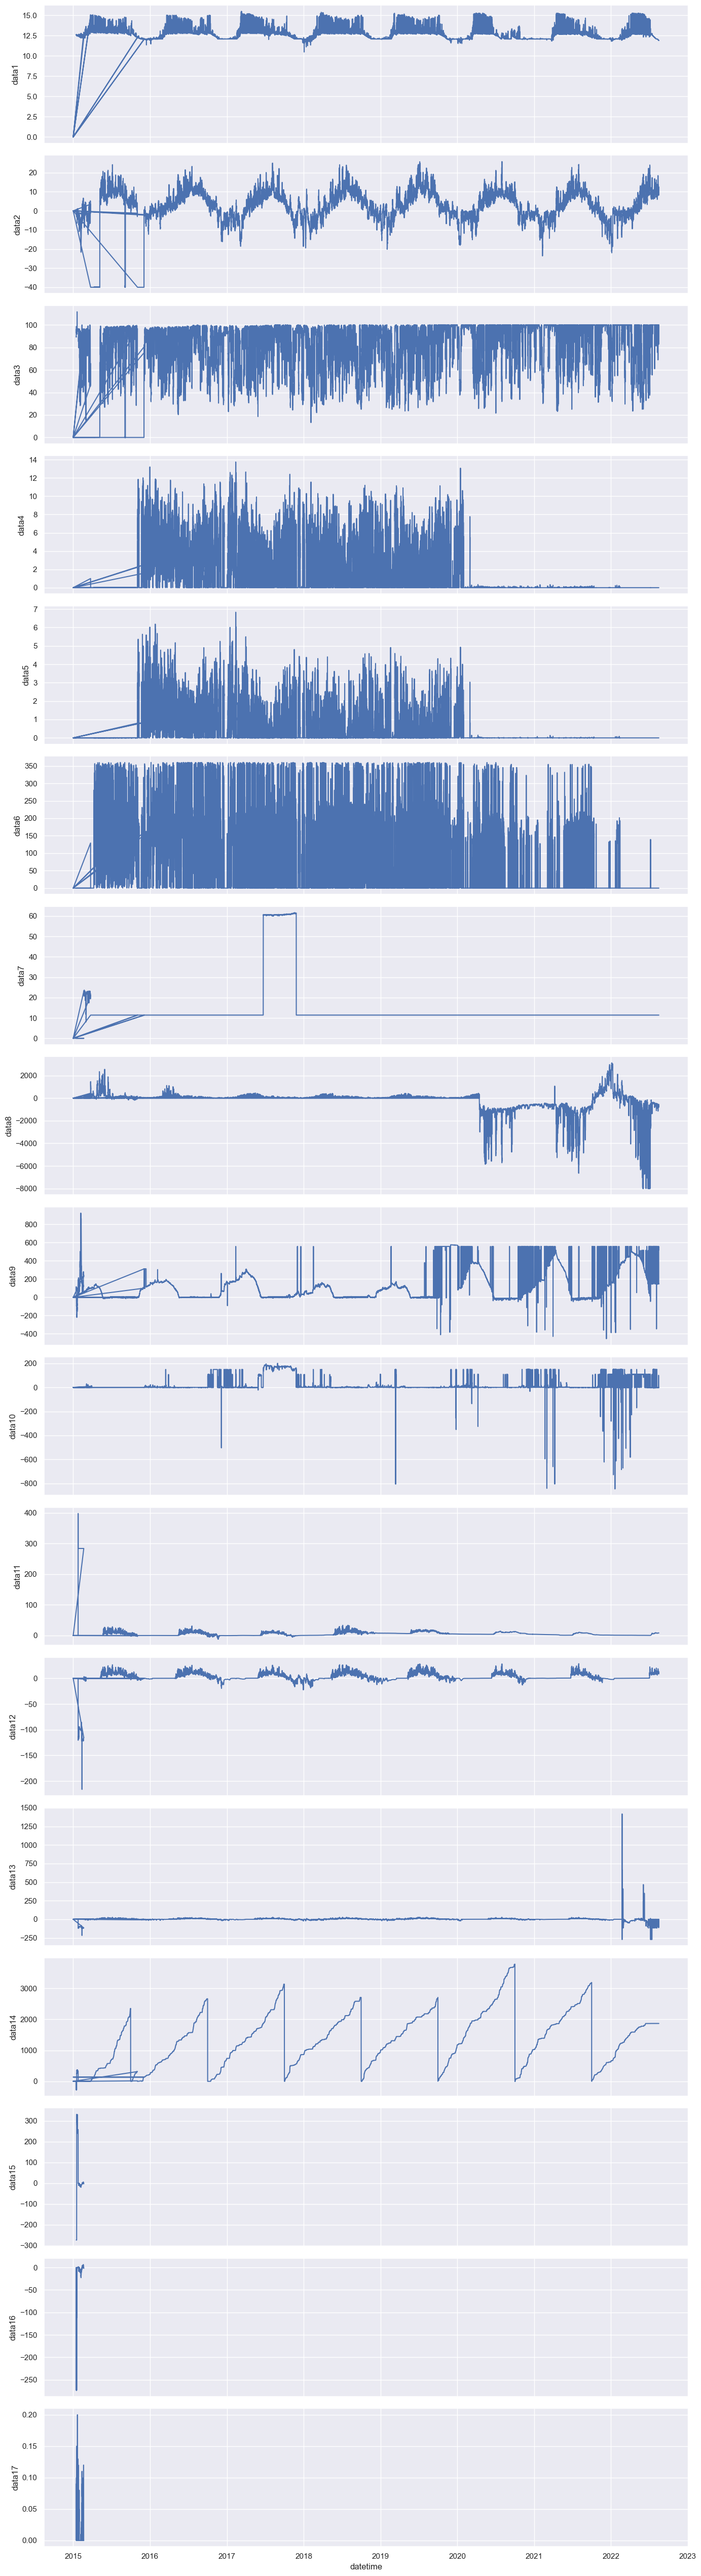

In [5]:
for col in df_micro.columns:
    if col not in ['datetime']:
        df_micro[col] = pd.to_numeric(df_micro[col], errors='coerce')

# Plot all variables as timeseries in subplots
variables = [col for col in df_micro.columns if col not in ['datetime']]
n_vars = len(variables)

fig, axes = plt.subplots(n_vars, 1, figsize=(14, 3 * n_vars), sharex=True)
if n_vars == 1:
    axes = [axes]

for ax, var in zip(axes, variables):
    ax.plot(df_micro[var])
    ax.set_ylabel(var)
    ax.grid(True)

axes[-1].set_xlabel('datetime')
plt.tight_layout()
plt.show()

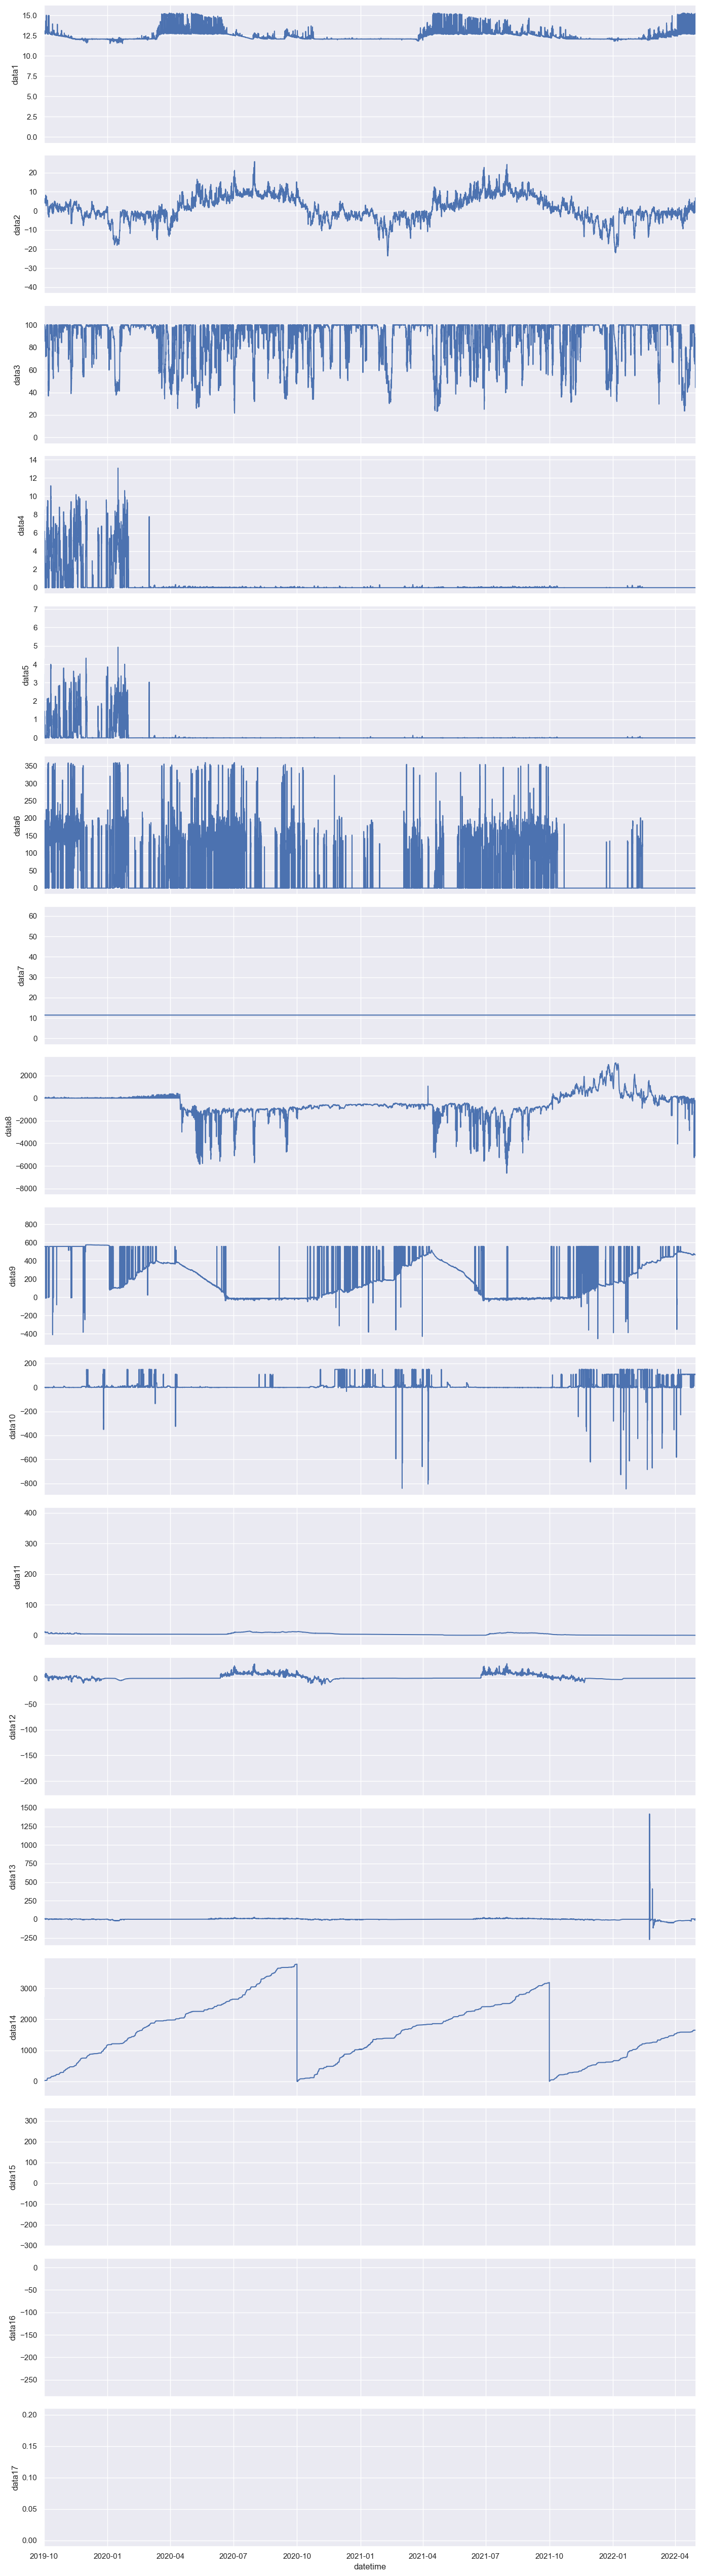

In [12]:
for col in df_micro.columns:
    if col not in ['datetime']:
        df_micro[col] = pd.to_numeric(df_micro[col], errors='coerce')

# Plot all variables as timeseries in subplots
variables = [col for col in df_micro.columns if col not in ['datetime']]
n_vars = len(variables)

fig, axes = plt.subplots(n_vars, 1, figsize=(14, 3 * n_vars), sharex=True)
if n_vars == 1:
    axes = [axes]

for ax, var in zip(axes, variables):
    ax.plot(df_micro[var])
    ax.set_ylabel(var)
    ax.grid(True)
    
# zoom into a specific date range
start_date = '2019-10-01'
end_date = '2022-05-01'
for ax in axes:
    ax.set_xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))

axes[-1].set_xlabel('datetime')
plt.tight_layout()
plt.show()

`df_micro['data9']` is snow depth, plot that with the snow depth from the synoptic website

### Now open the other datasets

In [47]:
filename = '/home/cassie/data/fishcreek/mesowest/rawdata/PPSA2_Synoptic_everything_utc_time_remove_header.csv'
df_mesowest= pd.read_csv(filename, sep = ",")
df_mesowest

/tmp/ipykernel_883344/17159684.py:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mesowest= pd.read_csv(filename, sep = ",")


,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,snow_depth_set_1,precip_accum_set_1,volt_set_1,snow_interval_set_1,heat_index_set_1d,dew_point_temperature_set_1d
0,NaN,NaN,Celsius,%,Millimeters,Millimeters,volts,Millimeters,Celsius,Celsius
1,PPSA2,2014-01-09T15:00:00Z,-1.43,91.9,NaN,NaN,NaN,NaN,NaN,-2.59
2,PPSA2,2014-01-09T15:30:00Z,-1.38,92.0,NaN,NaN,NaN,NaN,NaN,-2.53
3,PPSA2,2014-01-09T16:00:00Z,-1.38,91.9,NaN,NaN,NaN,NaN,NaN,-2.54
4,PPSA2,2014-01-09T16:30:00Z,-1.38,91.9,NaN,NaN,NaN,NaN,NaN,-2.54
...,...,...,...,...,...,...,...,...,...,...
82029,PPSA2,2025-06-27T08:00:00Z,8.31,94.0,3.81,2440.94,13.26,45.72,NaN,7.39
82030,PPSA2,2025-06-27T09:00:00Z,8.43,94.3,0.0,2440.94,13.26,48.26,NaN,7.56
82031,PPSA2,2025-06-27T10:00:00Z,8.61,93.3,0.0,2441.956,13.26,45.72,NaN,7.58
82032,PPSA2,2025-06-27T11:00:00Z,8.56,93.3,0.0,2441.956,13.27,45.72,NaN,7.53


In [48]:
# Convert 'Date_Time' to datetime, skipping the first row (units row)
df_mesowest = df_mesowest.iloc[1:].copy()
df_mesowest['Date_Time'] = pd.to_datetime(df_mesowest['Date_Time'], utc=True)
# set datetime as the index
df_mesowest.set_index('Date_Time', inplace=True)
df_mesowest.head()

,Station_ID,air_temp_set_1,relative_humidity_set_1,snow_depth_set_1,precip_accum_set_1,volt_set_1,snow_interval_set_1,heat_index_set_1d,dew_point_temperature_set_1d
Date_Time,,,,,,,,,
2014-01-09 15:00:00+00:00,PPSA2,-1.43,91.9,NaN,NaN,NaN,NaN,NaN,-2.59
2014-01-09 15:30:00+00:00,PPSA2,-1.38,92.0,NaN,NaN,NaN,NaN,NaN,-2.53
2014-01-09 16:00:00+00:00,PPSA2,-1.38,91.9,NaN,NaN,NaN,NaN,NaN,-2.54
2014-01-09 16:30:00+00:00,PPSA2,-1.38,91.9,NaN,NaN,NaN,NaN,NaN,-2.54
2014-01-09 17:00:00+00:00,PPSA2,-1.38,91.8,NaN,NaN,NaN,NaN,NaN,-2.56


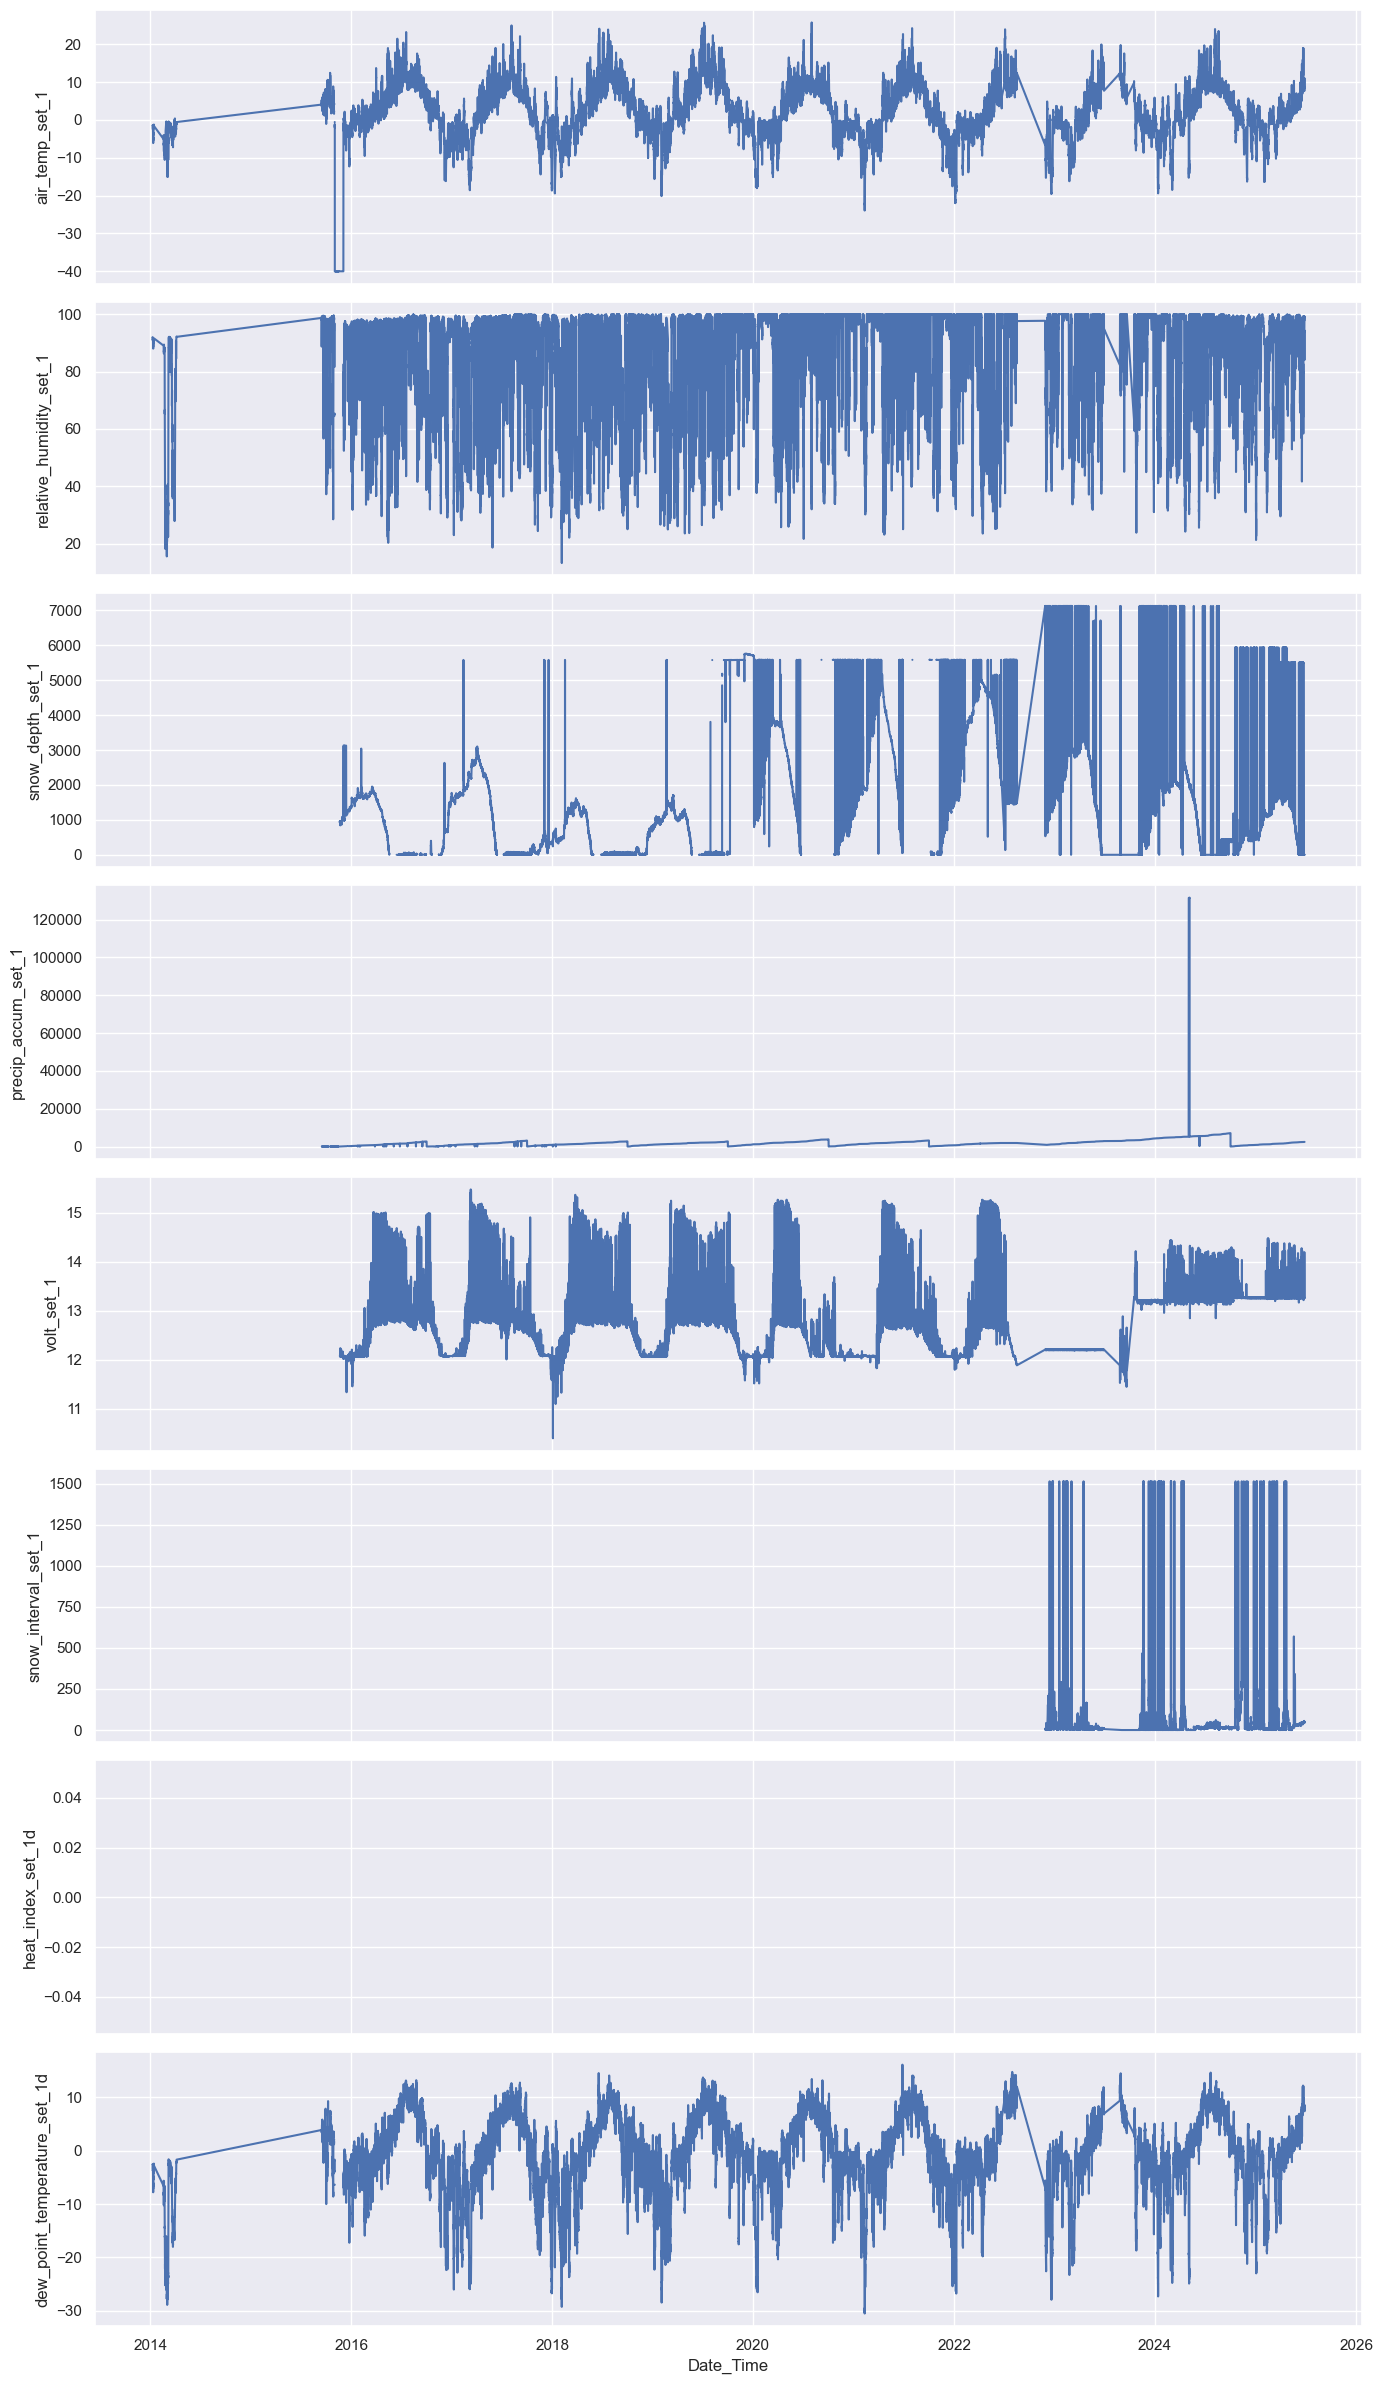

In [49]:
# Convert all other columns (except Station_ID) to numeric, coerce errors
for col in df_mesowest.columns:
    if col not in ['Station_ID', 'Date_Time']:
        df_mesowest[col] = pd.to_numeric(df_mesowest[col], errors='coerce')

# Plot all variables as timeseries in subplots
variables = [col for col in df_mesowest.columns if col not in ['Station_ID', 'Date_Time']]
n_vars = len(variables)

fig, axes = plt.subplots(n_vars, 1, figsize=(14, 3 * n_vars), sharex=True)
if n_vars == 1:
    axes = [axes]

for ax, var in zip(axes, variables):
    ax.plot(df_mesowest[var])
    ax.set_ylabel(var)
    ax.grid(True)

axes[-1].set_xlabel('Date_Time')
plt.tight_layout()
plt.show()

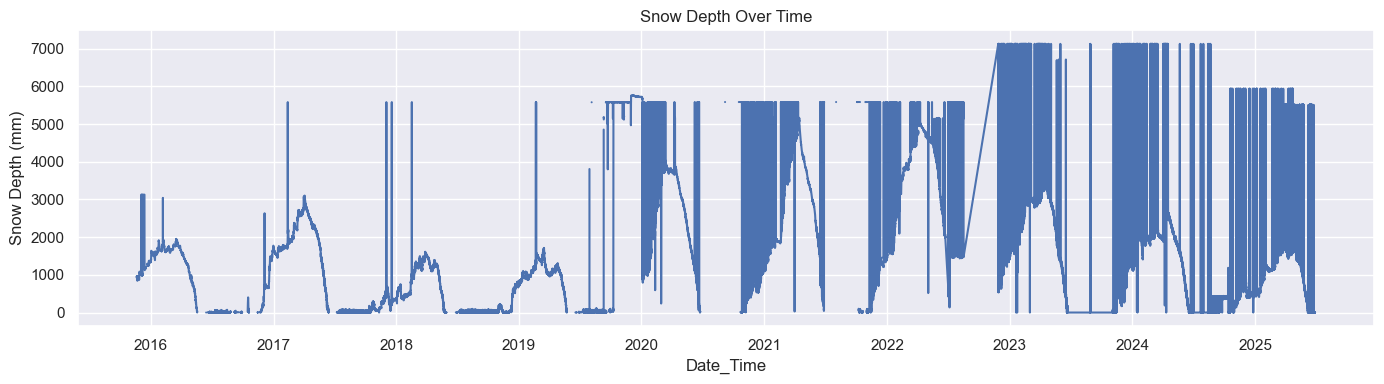

In [50]:
plt.figure(figsize=(14, 4))
plt.plot(df_mesowest['snow_depth_set_1'])
plt.xlabel('Date_Time')
plt.ylabel('Snow Depth (mm)')
plt.title('Snow Depth Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

Now, download the Mesonet data as well to plot this with the Mesowest data...

In [51]:
# download mesonet data as well to plot this with the Mesowest data...
filename = '/home/cassie/data/fishcreek/mesonet/rawdata/PowderPatch_everything_until_1June2025.txt'
df_mesonet = pd.read_csv(filename, sep = ",")

# make utc_valid a datetime and index the df_mesonet by it 
df_mesonet['datetime'] = pd.to_datetime(df_mesonet['utc_valid'], utc=True)
df_mesonet = df_mesonet.set_index('datetime')
df_mesonet.head()

df_mesonet.head()

,station,utc_valid,PCIRZZ,PCIRZZZ,RNIRZZ,SDIRZZ,SDIRZZZ,TAIRZZ,TAIRZZZ,UDIRZZ,UHIRZZZ,UPIRZZ,UPIRZZZ,USIRZZ,USIRZZZ,VBIRZZ,VBIRZZZ,XRIRZZ,XRIRZZZ
datetime,,,,,,,,,,,,,,,,,,,
2010-12-15 22:00:00+00:00,PPSA2,2010-12-15 22:00:00,NaN,NaN,0.0,35.0,NaN,18.0,NaN,170.0,NaN,NaN,NaN,1.790,NaN,NaN,NaN,80.20,NaN
2011-01-09 04:15:00+00:00,PPSA2,2011-01-09 04:15:00,NaN,NaN,NaN,55.0,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.00,NaN
2011-05-21 03:45:00+00:00,PPSA2,2011-05-21 03:45:00,NaN,NaN,0.0,90.0,NaN,50.3,NaN,102.0,NaN,NaN,NaN,0.631,NaN,NaN,NaN,73.79,NaN
2011-05-21 04:15:00+00:00,PPSA2,2011-05-21 04:15:00,NaN,NaN,0.0,90.0,NaN,45.7,NaN,103.0,NaN,NaN,NaN,1.060,NaN,NaN,NaN,84.80,NaN
2011-05-21 04:45:00+00:00,PPSA2,2011-05-21 04:45:00,NaN,NaN,0.0,90.0,NaN,44.5,NaN,110.0,NaN,NaN,NaN,1.270,NaN,NaN,NaN,87.10,NaN


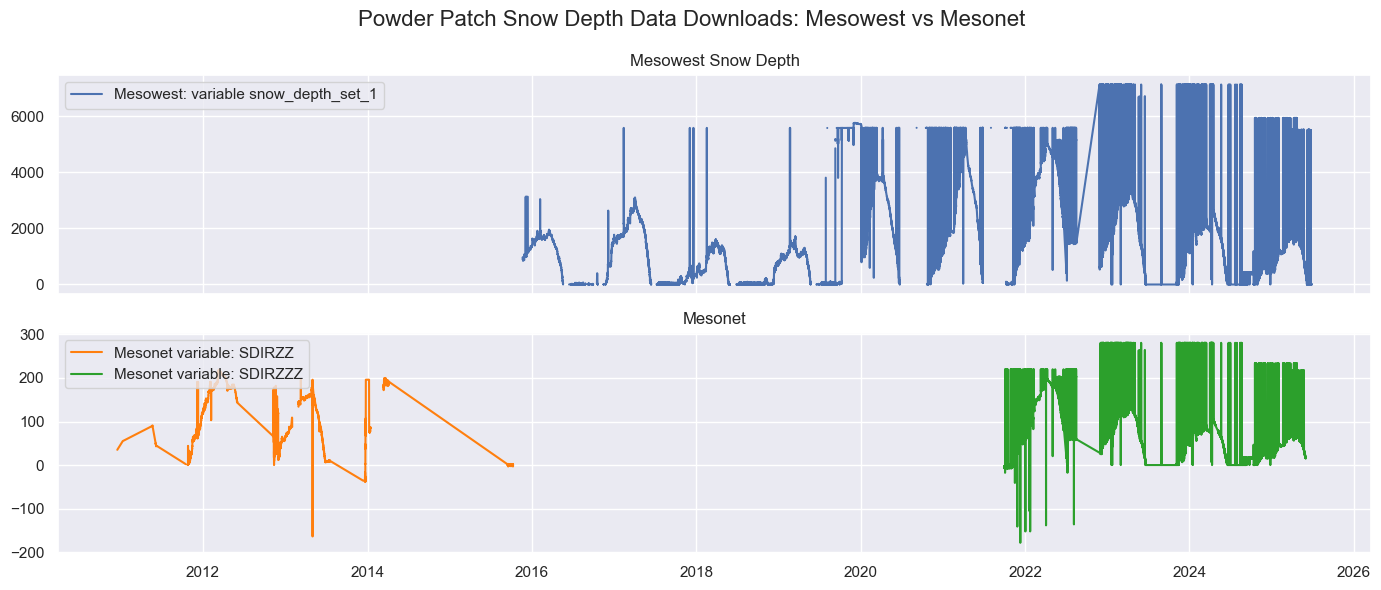

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

plt.suptitle('Powder Patch Snow Depth Data Downloads: Mesowest vs Mesonet', fontsize=16)
# Plot Mesowest snow depth
axes[0].plot(df_mesowest.index, df_mesowest['snow_depth_set_1'], label='Mesowest: variable snow_depth_set_1')
axes[0].set_title('Mesowest Snow Depth')
axes[0].legend(loc='upper left')
axes[0].grid(True)

# Plot Mesonet SDIRZZ
axes[1].plot(df_mesonet.index, df_mesonet['SDIRZZ'], label='Mesonet variable: SDIRZZ', color='tab:orange')
axes[1].plot(df_mesonet.index, df_mesonet['SDIRZZZ'], label='Mesonet variable: SDIRZZZ', color='tab:green')

axes[1].set_title('Mesonet')
axes[1].legend(loc='upper left')
axes[1].grid(True)

# # Plot Mesonet SDIRZZZ
# axes[2].plot(df_mesonet.index, df_mesonet['SDIRZZZ'], label='Mesonet SDIRZZZ', color='tab:green')
# axes[2].set_ylabel('Snow Depth (cm)')
# axes[2].set_title('Mesonet SDIRZZZ')
# axes[2].legend()
# axes[2].grid(True)

axes[1].set_xlabel('')
plt.tight_layout()
plt.show()

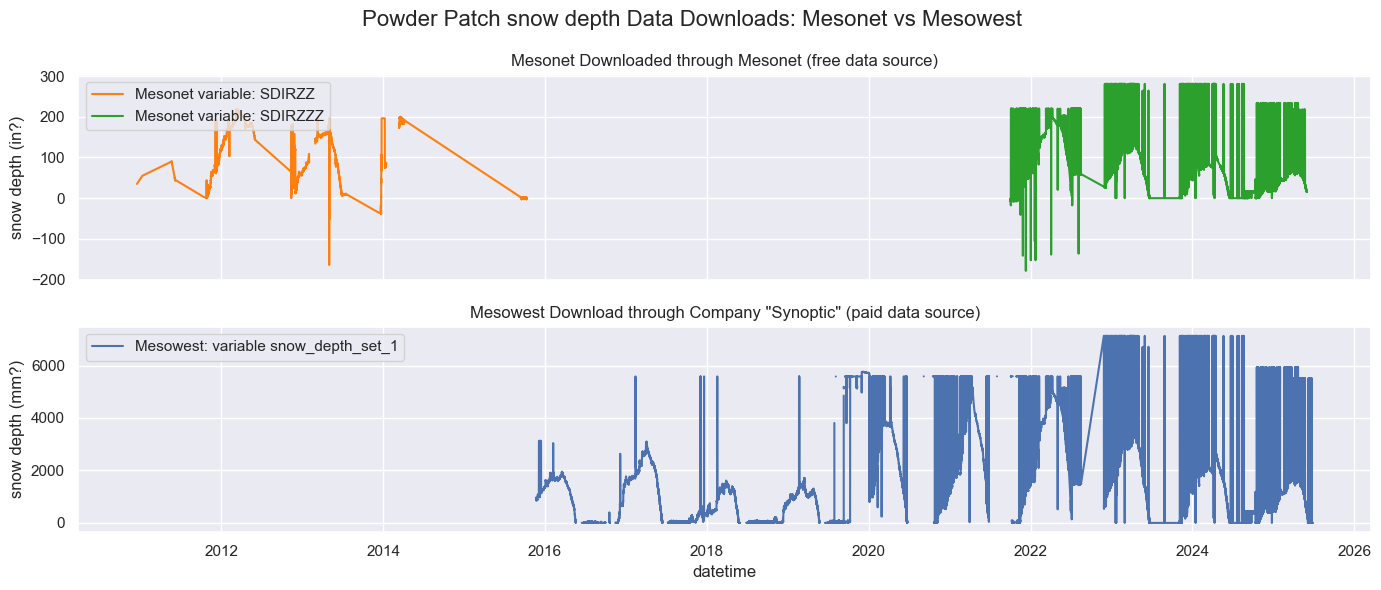

In [53]:
fig, axes = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

plt.suptitle('Powder Patch snow depth Data Downloads: Mesonet vs Mesowest', fontsize=16)

# Plot Mesonet 
axes[0].plot(df_mesonet.index, df_mesonet['SDIRZZ'], label='Mesonet variable: SDIRZZ', color='tab:orange')
axes[0].plot(df_mesonet.index, df_mesonet['SDIRZZZ'], label='Mesonet variable: SDIRZZZ', color='tab:green')

axes[0].set_ylabel('snow depth (in?)')
axes[0].set_title('Mesonet Downloaded through Mesonet (free data source)')
axes[0].legend(loc='upper left')
axes[0].grid(True)

# Plot Mesowest
axes[1].plot(df_mesowest.index, df_mesowest['snow_depth_set_1'], label='Mesowest: variable snow_depth_set_1')
axes[1].set_ylabel('snow depth (mm?)')
axes[1].set_title('Mesowest Download through Company "Synoptic" (paid data source)')
axes[1].legend(loc='upper left')
axes[1].grid(True)

axes[1].set_xlabel('datetime')
plt.tight_layout()
plt.show()

## Now, add micro specialties to this plot. 

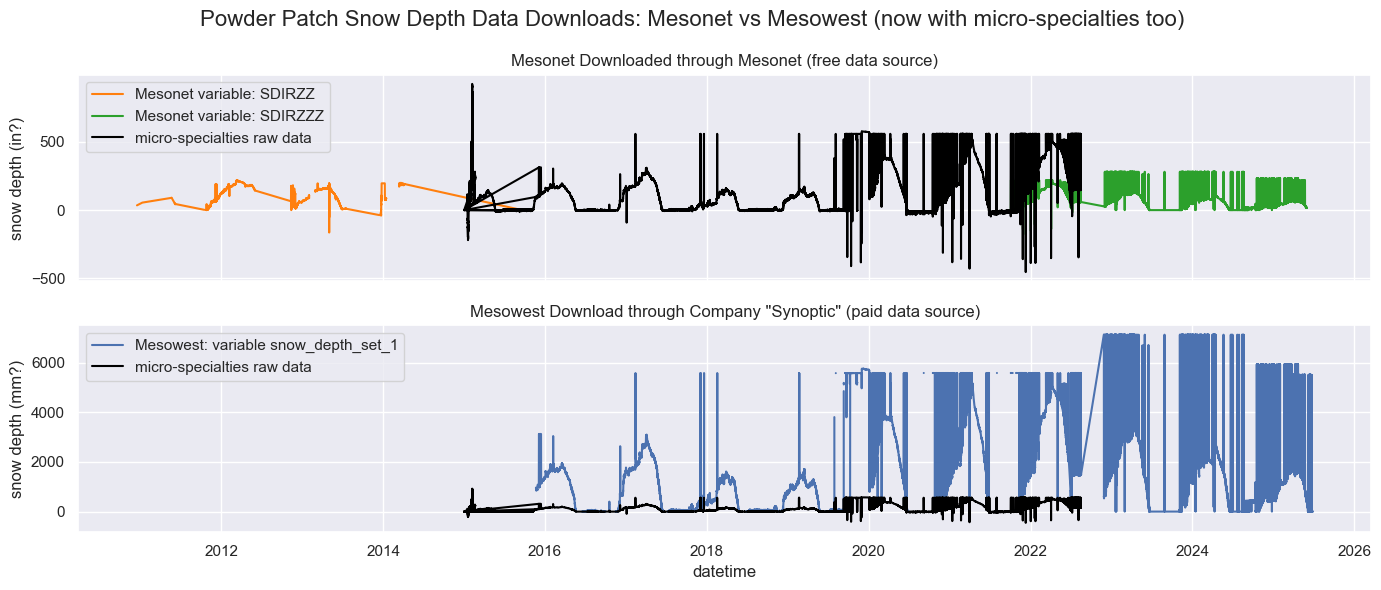

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

plt.suptitle('Powder Patch Snow Depth Data Downloads: Mesonet vs Mesowest (now with micro-specialties too)', fontsize=16)

# Plot Mesonet 
axes[0].plot(df_mesonet.index, df_mesonet['SDIRZZ'], label='Mesonet variable: SDIRZZ', color='tab:orange')
axes[0].plot(df_mesonet.index, df_mesonet['SDIRZZZ'], label='Mesonet variable: SDIRZZZ', color='tab:green')
axes[0].plot(df_micro.index, df_micro['data9'], label='micro-specialties raw data', color='black')

axes[0].set_ylabel('snow depth (in?)')
axes[0].set_title('Mesonet Downloaded through Mesonet (free data source)')
axes[0].legend(loc='upper left')
axes[0].grid(True)

# Plot Mesowest
axes[1].plot(df_mesowest.index, df_mesowest['snow_depth_set_1'], label='Mesowest: variable snow_depth_set_1')
axes[1].set_ylabel('snow depth (mm?)')
axes[1].set_title('Mesowest Download through Company "Synoptic" (paid data source)')
axes[1].plot(df_micro.index, df_micro['data9'], label='micro-specialties raw data', color='black')
axes[1].legend(loc='upper left')
axes[1].grid(True)

axes[1].set_xlabel('datetime')
plt.tight_layout()
plt.show()

## Fix Units

In [55]:
# Create a tidy dataframe with datetime as index and snow depth variables as columns

# Prepare Mesowest snow depth (convert mm to cm)
mesowest_sd = df_mesowest[['snow_depth_set_1']].copy()
# mesowest_sd = mesowest_sd.dropna(subset=['snow_depth_set_1']) # removed all the Date_Time so we don't need this code anymore...
# mesowest_sd['Date_Time'] = pd.to_datetime(mesowest_sd['Date_Time'])
# mesowest_sd = mesowest_sd.set_index('Date_Time')
mesowest_sd['snow_depth_mesowest_cm'] = mesowest_sd['snow_depth_set_1'] / 10.0
mesowest_sd = mesowest_sd[['snow_depth_mesowest_cm']]

# Prepare Mesonet snow depths (already in cm)
mesonet_sd = df_mesonet[['SDIRZZ', 'SDIRZZZ']].copy()
mesonet_sd = mesonet_sd.rename(columns={'SDIRZZ': 'snow_depth_mesonet_cm', 'SDIRZZZ': 'snow_depth_mesonet2_cm'})

# Join on datetime index (outer join to keep all timestamps)
df_snow = mesowest_sd.join(mesonet_sd, how='outer')

# Remove negative snow depths
for col in df_snow.columns:
    df_snow.loc[df_snow[col] < 0, col] = np.nan

df_snow.head()

,snow_depth_mesowest_cm,snow_depth_mesonet_cm,snow_depth_mesonet2_cm
2010-12-15 22:00:00+00:00,NaN,35.0,NaN
2011-01-09 04:15:00+00:00,NaN,55.0,NaN
2011-05-21 03:45:00+00:00,NaN,90.0,NaN
2011-05-21 04:15:00+00:00,NaN,90.0,NaN
2011-05-21 04:45:00+00:00,NaN,90.0,NaN


In [64]:
# create a new tidy dataframe with just the snow depth data from both sources for easier comparison
df_mesonet_snow = df_mesonet[['SDIRZZ', 'SDIRZZZ']].copy()
df_mesonet_snow = df_mesonet_snow.rename(columns={'SDIRZZ': 'mesonet_SDIRZZ', 'SDIRZZZ': 'mesonet_SDIRZZZ'})

# now create a df_mesowest_snow
df_mesowest_snow = df_mesowest[['snow_depth_set_1']].copy()
df_mesowest_snow = df_mesowest_snow.rename(columns={'snow_depth_set_1': 'mesowest_snow_depth_set_1'})

# now create a df_micro_snow
df_micro_snow = df_micro[['data9']].copy()
df_micro_snow = df_micro_snow.rename(columns={'data9': 'micro_snow_depth'})

# combine the two dataframes on their datetime index
df_snow = pd.concat([df_mesonet_snow, df_mesowest_snow, df_micro_snow], axis=0)
df_snow.head()

,mesonet_SDIRZZ,mesonet_SDIRZZZ,mesowest_snow_depth_set_1,micro_snow_depth
2010-12-15 22:00:00+00:00,35.0,NaN,NaN,NaN
2011-01-09 04:15:00+00:00,55.0,NaN,NaN,NaN
2011-05-21 03:45:00+00:00,90.0,NaN,NaN,NaN
2011-05-21 04:15:00+00:00,90.0,NaN,NaN,NaN
2011-05-21 04:45:00+00:00,90.0,NaN,NaN,NaN


In [65]:
# convert mesonet_SDIRZZ and mesonet_SDIRZZZ from inches to cm 
df_snow['mesonet_SDIRZZ'] = df_snow['mesonet_SDIRZZ'] * 2.54  # inches to cm
df_snow['mesonet_SDIRZZZ'] = df_snow['mesonet_SDIRZZZ'] * 2.54  # inches to cm
# df_snow['micro_snow_depth'] = df_snow['micro_snow_depth'] * 2.54  # inches to cm, not sure about the micro specialties units... 

# convert mesowest snow_depth_set_1 from mm to cm
df_snow['mesowest_snow_depth_set_1'] = df_snow['mesowest_snow_depth_set_1'] / 10.0  # mm to cm
df_snow.head()

,mesonet_SDIRZZ,mesonet_SDIRZZZ,mesowest_snow_depth_set_1,micro_snow_depth
2010-12-15 22:00:00+00:00,88.9,NaN,NaN,NaN
2011-01-09 04:15:00+00:00,139.7,NaN,NaN,NaN
2011-05-21 03:45:00+00:00,228.6,NaN,NaN,NaN
2011-05-21 04:15:00+00:00,228.6,NaN,NaN,NaN
2011-05-21 04:45:00+00:00,228.6,NaN,NaN,NaN


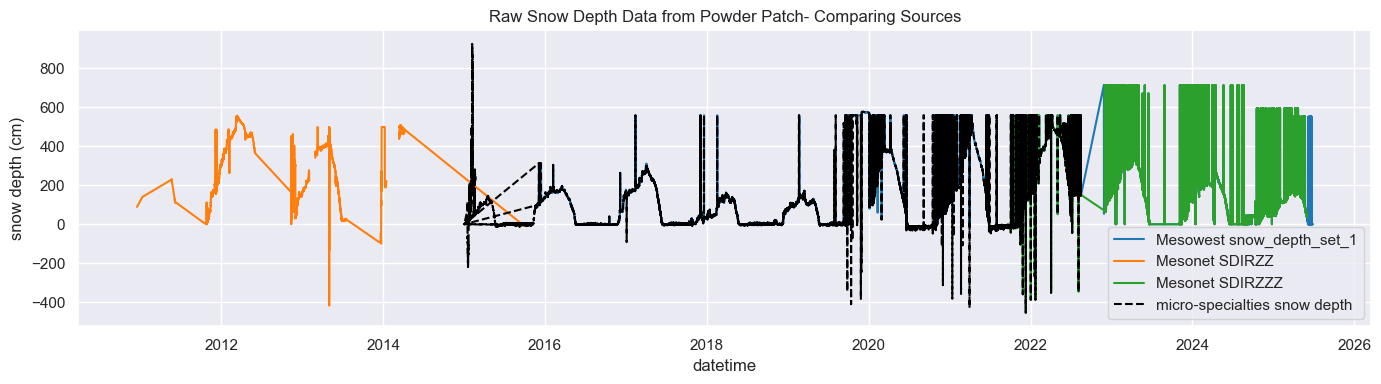

In [73]:
# now plot all three variables on the same plot with different colors 
plt.figure(figsize=(14, 4))
plt.plot(df_snow.index, df_snow['mesowest_snow_depth_set_1'], label='Mesowest snow_depth_set_1', color='tab:blue')
plt.plot(df_snow.index, df_snow['mesonet_SDIRZZ'], label='Mesonet SDIRZZ', color='tab:orange')
plt.plot(df_snow.index, df_snow['mesonet_SDIRZZZ'], label='Mesonet SDIRZZZ', color='tab:green')
plt.plot(df_snow.index, df_snow['micro_snow_depth'], label='micro-specialties snow depth', color='black', linestyle='--')

plt.xlabel('datetime')
plt.ylabel('snow depth (cm)')
plt.title('Raw Snow Depth Data from Powder Patch- Comparing Sources')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

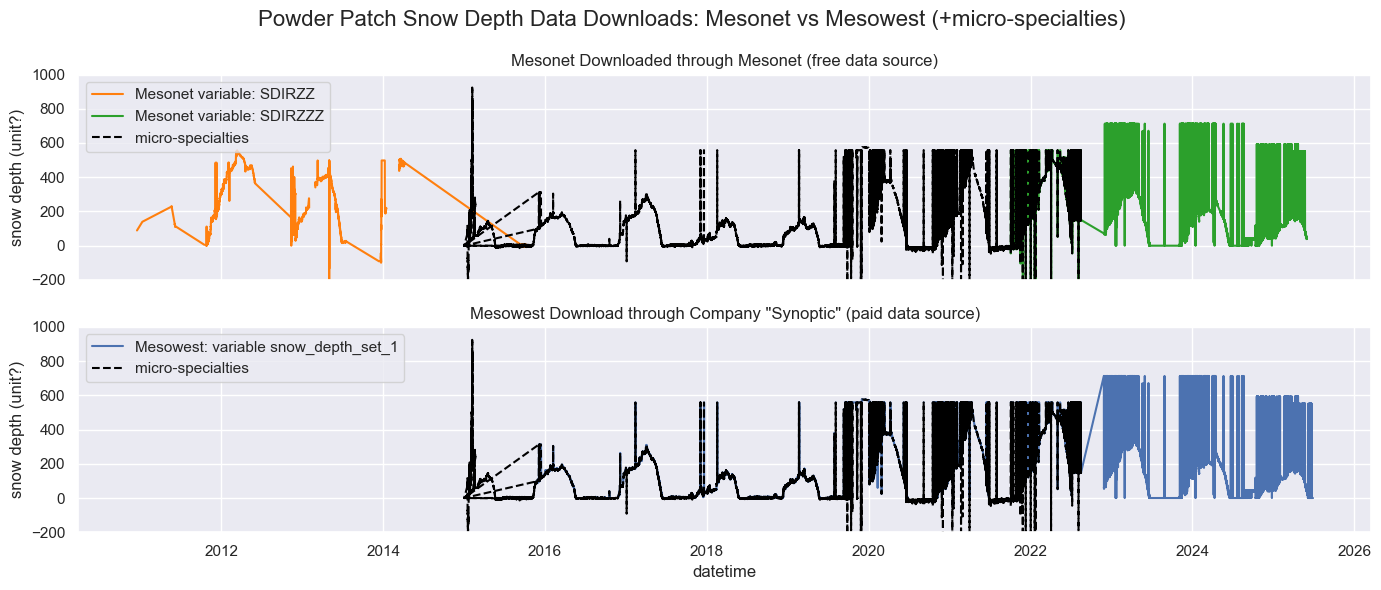

In [72]:
fig, axes = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

plt.suptitle('Powder Patch Snow Depth Data Downloads: Mesonet vs Mesowest (+micro-specialties)', fontsize=16)

# Plot Mesonet 
axes[0].plot(df_snow.index, df_snow['mesonet_SDIRZZ'], label='Mesonet variable: SDIRZZ', color='tab:orange')
axes[0].plot(df_snow.index, df_snow['mesonet_SDIRZZZ'], label='Mesonet variable: SDIRZZZ', color='tab:green')
axes[0].plot(df_snow.index, df_snow['micro_snow_depth'], label='micro-specialties', color='black', linestyle='--')

axes[0].set_ylabel('snow depth (unit?)')
axes[0].set_title('Mesonet Downloaded through Mesonet (free data source)')
axes[0].legend(loc='upper left')
axes[0].grid(True)

# Plot Mesowest
axes[1].plot(df_snow.index, df_snow['mesowest_snow_depth_set_1'], label='Mesowest: variable snow_depth_set_1')
axes[1].plot(df_snow.index, df_snow['micro_snow_depth'], label='micro-specialties', color='black', linestyle='--')

axes[1].set_ylabel('snow depth (unit?)')
axes[1].set_title('Mesowest Download through Company "Synoptic" (paid data source)')
axes[1].legend(loc='upper left')
axes[1].grid(True)

axes[1].set_xlabel('datetime')

# plot the y-axis from 0 to 100 cm for both plots for easier comparison
axes[0].set_ylim(-200, 1000)
axes[1].set_ylim(-200, 1000)

plt.tight_layout()
plt.show()

## Some cleaning by water year to remove the large values with a variable...

In [18]:
df_snow

,mesonet_SDIRZZ,mesonet_SDIRZZZ,mesowest_snow_depth_set_1
2010-12-15 22:00:00+00:00,88.9,NaN,NaN
2011-01-09 04:15:00+00:00,139.7,NaN,NaN
2011-05-21 03:45:00+00:00,228.6,NaN,NaN
2011-05-21 04:15:00+00:00,228.6,NaN,NaN
2011-05-21 04:45:00+00:00,228.6,NaN,NaN
...,...,...,...
2025-06-27 08:00:00+00:00,NaN,NaN,0.381
2025-06-27 09:00:00+00:00,NaN,NaN,0.000
2025-06-27 10:00:00+00:00,NaN,NaN,0.000
2025-06-27 11:00:00+00:00,NaN,NaN,0.000


In [22]:
df_snow_clean = df_snow.copy()

# Step 1: Compute water year (1 Oct - 30 Sept)
df_snow_clean['datetime'] = pd.to_datetime(df_snow_clean.index)  # Ensure datetime
df_snow_clean['water_year'] = df_snow_clean['datetime'].apply(
    lambda d: d.year + 1 if d.month >= 10 else d.year
)

df_snow_clean

,mesonet_SDIRZZ,mesonet_SDIRZZZ,mesowest_snow_depth_set_1,datetime,water_year
2010-12-15 22:00:00+00:00,88.9,NaN,NaN,2010-12-15 22:00:00+00:00,2011
2011-01-09 04:15:00+00:00,139.7,NaN,NaN,2011-01-09 04:15:00+00:00,2011
2011-05-21 03:45:00+00:00,228.6,NaN,NaN,2011-05-21 03:45:00+00:00,2011
2011-05-21 04:15:00+00:00,228.6,NaN,NaN,2011-05-21 04:15:00+00:00,2011
2011-05-21 04:45:00+00:00,228.6,NaN,NaN,2011-05-21 04:45:00+00:00,2011
...,...,...,...,...,...
2025-06-27 08:00:00+00:00,NaN,NaN,0.381,2025-06-27 08:00:00+00:00,2025
2025-06-27 09:00:00+00:00,NaN,NaN,0.000,2025-06-27 09:00:00+00:00,2025
2025-06-27 10:00:00+00:00,NaN,NaN,0.000,2025-06-27 10:00:00+00:00,2025
2025-06-27 11:00:00+00:00,NaN,NaN,0.000,2025-06-27 11:00:00+00:00,2025


<Axes: >

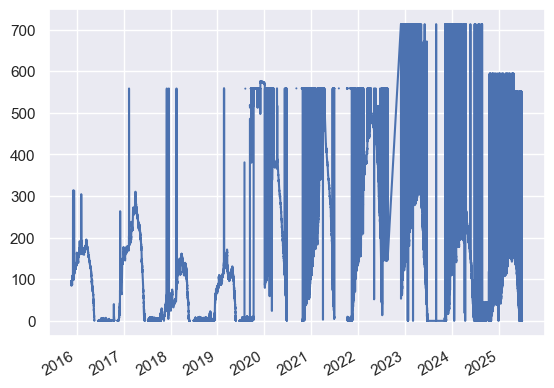

In [23]:
df_snow_clean.mesowest_snow_depth_set_1.plot()

In [26]:
# print the max value for each water_year
# for col in ['mesonet_SDIRZZ', 'mesonet_SDIRZZZ', 'mesowest_snow_depth_set_1']:
for col in ['mesowest_snow_depth_set_1']:
    if col in df_snow_clean.columns:
        print(f"\nMaximum values of {col} by water year:")
        print(df_snow_clean.groupby('water_year')[col].max())


Maximum values of mesowest_snow_depth_set_1 by water year:
water_year
2011         NaN
2012         NaN
2013         NaN
2014         NaN
2015         NaN
2016    312.8010
2017    558.2920
2018    558.2920
2019    558.2920
2020    576.3006
2021    558.5968
2022    558.5968
2023    713.0034
2024    713.0034
2025    594.0044
Name: mesowest_snow_depth_set_1, dtype: float64


In [27]:
# Step 2: Define water year max thresholds
wy_max_depth = {
    2012: 600, # mesonet only, not great 
    2013: 600, # mesonet only, not great 
    2014: 600, # mesonet only, not great 
    2015: 600, # mesonet only, not great 
    2016: 250,
    2017: 350,
    2018: 350,
    2019: 250,
    2020: 500, # the data for this year is pretty tough, might need to remove a lot.. come back to this value 
    2021: 500,
    2022: 500,
    2023: 400,
    2024: 400,
    2025: 400,
}

# Step 3: Clean snow depth columns based on water year-specific max
for col in ['mesonet_SDIRZZ', 'mesonet_SDIRZZZ', 'mesowest_snow_depth_set_1']:
    if col in df_snow_clean.columns:
        df_snow_clean[col] = df_snow_clean.apply(
            lambda row: row[col] if (0 <= row[col] <= wy_max_depth.get(row['water_year'], 450)) else None,
            axis=1
        )

In [28]:
## Light cleaning code, which is based on a max value of 450 for all years 
# df_snow_clean = df_snow.copy()

# for col in ['mesonet_SDIRZZ', 'mesonet_SDIRZZZ', 'mesowest_snow_depth_set_1']:
#     if col in df_snow_clean.columns:
#         df_snow_clean[col] = df_snow_clean[col].where(
#             (df_snow_clean[col] >= 0) & (df_snow_clean[col] <= 450)
#         )
# df_snow_clean.head()

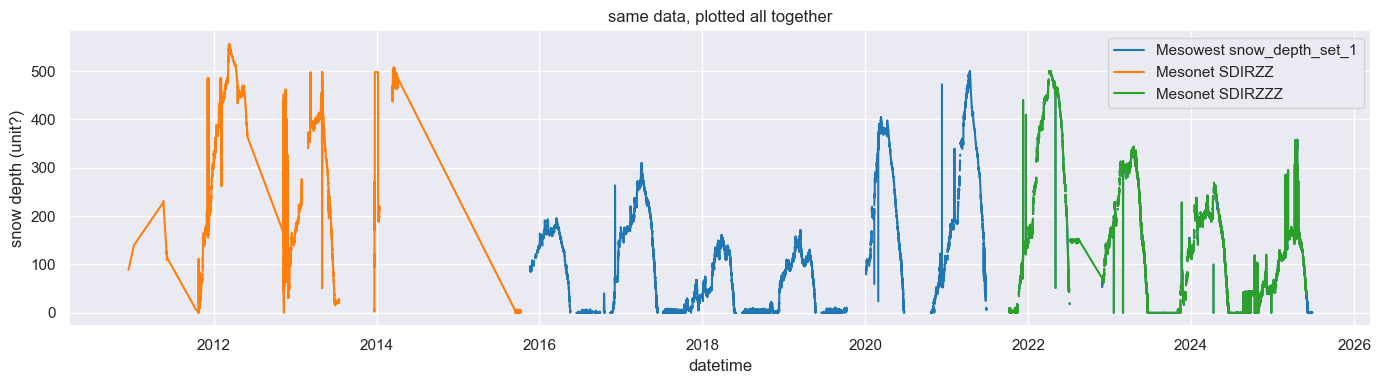

In [29]:
# now plot all three variables on the same plot with different colors 
plt.figure(figsize=(14, 4))
plt.plot(df_snow_clean.index, df_snow_clean['mesowest_snow_depth_set_1'], label='Mesowest snow_depth_set_1', color='tab:blue')
plt.plot(df_snow_clean.index, df_snow_clean['mesonet_SDIRZZ'], label='Mesonet SDIRZZ', color='tab:orange')
plt.plot(df_snow_clean.index, df_snow_clean['mesonet_SDIRZZZ'], label='Mesonet SDIRZZZ', color='tab:green')
plt.xlabel('datetime')
plt.ylabel('snow depth (unit?)')
plt.title('same data, plotted all together')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cleaning

In [37]:
df_snow_clean

,mesonet_sd1,mesonet_sd2,mesowest_sd1,datetime,water_year
2010-12-15 22:00:00+00:00,88.9,NaN,NaN,2010-12-15 22:00:00+00:00,2011
2011-01-09 04:15:00+00:00,139.7,NaN,NaN,2011-01-09 04:15:00+00:00,2011
2011-05-21 03:45:00+00:00,228.6,NaN,NaN,2011-05-21 03:45:00+00:00,2011
2011-05-21 04:15:00+00:00,228.6,NaN,NaN,2011-05-21 04:15:00+00:00,2011
2011-05-21 04:45:00+00:00,228.6,NaN,NaN,2011-05-21 04:45:00+00:00,2011
...,...,...,...,...,...
2025-06-27 08:00:00+00:00,NaN,NaN,0.381,2025-06-27 08:00:00+00:00,2025
2025-06-27 09:00:00+00:00,NaN,NaN,0.000,2025-06-27 09:00:00+00:00,2025
2025-06-27 10:00:00+00:00,NaN,NaN,0.000,2025-06-27 10:00:00+00:00,2025
2025-06-27 11:00:00+00:00,NaN,NaN,0.000,2025-06-27 11:00:00+00:00,2025


Renaming to the snow depth columns so things are easier to read...

In [35]:
#rename the variable names so that's its easier to work with... 
df_snow_clean = df_snow_clean.rename(columns={
    'mesowest_snow_depth_set_1': 'mesowest_sd1',
    'mesonet_SDIRZZ': 'mesonet_sd1',
    'mesonet_SDIRZZZ': 'mesonet_sd2'
})
df_snow_clean.head()

,mesonet_sd1,mesonet_sd2,mesowest_sd1,datetime,water_year
2010-12-15 22:00:00+00:00,88.9,NaN,NaN,2010-12-15 22:00:00+00:00,2011
2011-01-09 04:15:00+00:00,139.7,NaN,NaN,2011-01-09 04:15:00+00:00,2011
2011-05-21 03:45:00+00:00,228.6,NaN,NaN,2011-05-21 03:45:00+00:00,2011
2011-05-21 04:15:00+00:00,228.6,NaN,NaN,2011-05-21 04:15:00+00:00,2011
2011-05-21 04:45:00+00:00,228.6,NaN,NaN,2011-05-21 04:45:00+00:00,2011


Now, try some smoothing

In [27]:
# frac = 0.1 
# df_snow_clean_smoothed = sm.nonparametric.lowess(df_snow_clean, frac=frac, return_sorted=False)
# df_snow_clean_smoothed

# Set smoothing parameter
frac = 0.02  # Adjust this for more/less smoothing

# Reset index to access 'datetime' as a column
df_snow_clean_smoothed = df_snow_clean.reset_index()

# Apply LOWESS smoothing to all numeric columns
for col in ["mesonet_sd1", "mesonet_sd2", "mesowest_sd1"]:
    df_snow_clean_smoothed[col] = sm.nonparametric.lowess(
        df_snow_clean_smoothed[col], df_snow_clean_smoothed["datetime"], frac=frac, return_sorted=False
    )

# Restore datetime as index
df_snow_clean_smoothed.set_index("datetime", inplace=True)
df_snow_clean_smoothed.head()

,index,mesonet_sd1,mesonet_sd2,mesowest_sd1
datetime,,,,
2010-12-15 22:00:00+00:00,2010-12-15 22:00:00+00:00,-734.019461,NaN,NaN
2011-01-09 04:15:00+00:00,2011-01-09 04:15:00+00:00,-677.148819,NaN,NaN
2011-05-21 03:45:00+00:00,2011-05-21 03:45:00+00:00,-367.753918,NaN,NaN
2011-05-21 04:15:00+00:00,2011-05-21 04:15:00+00:00,-367.705075,NaN,NaN
2011-05-21 04:45:00+00:00,2011-05-21 04:45:00+00:00,-367.656233,NaN,NaN


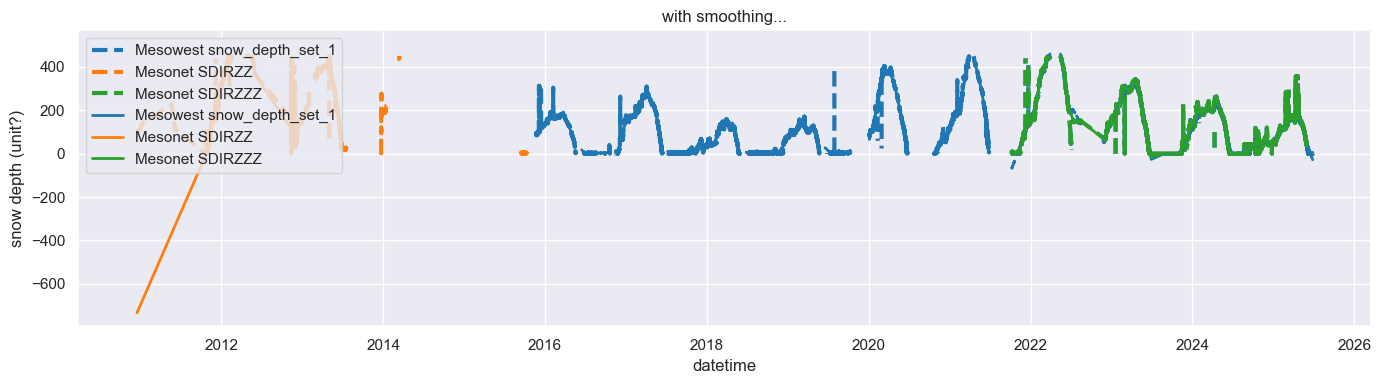

In [28]:
# now plot all three variables on the same plot with different colors 
plt.figure(figsize=(14, 4))
plt.plot(df_snow_clean.index, df_snow_clean['mesowest_sd1'], label='Mesowest snow_depth_set_1', color='tab:blue', linestyle='--', linewidth=3)
plt.plot(df_snow_clean.index, df_snow_clean['mesonet_sd1'], label='Mesonet SDIRZZ', color='tab:orange', linestyle='--',linewidth=3)
plt.plot(df_snow_clean.index, df_snow_clean['mesonet_sd2'], label='Mesonet SDIRZZZ', color='tab:green', linestyle='--',linewidth=3)

plt.plot(df_snow_clean_smoothed.index, df_snow_clean_smoothed['mesowest_sd1'], label='Mesowest snow_depth_set_1', color='tab:blue',linewidth=2)
plt.plot(df_snow_clean_smoothed.index, df_snow_clean_smoothed['mesonet_sd1'], label='Mesonet SDIRZZ', color='tab:orange',linewidth=2)
plt.plot(df_snow_clean_smoothed.index, df_snow_clean_smoothed['mesonet_sd2'], label='Mesonet SDIRZZZ', color='tab:green',linewidth=2)


plt.xlabel('datetime')
plt.ylabel('snow depth (unit?)')
plt.title('with smoothing...')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()